In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importando as bibliotecas necessárias
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Configurando parâmetros globais
image_size = (128, 128)  # Redimensionar as imagens para este tamanho
batch_size = 32  # Quantidade de imagens que serão processadas em cada batch

# Caminhos do dataset
train_dir = 'dataset/train'
test_dir = 'dataset/val'

# Preparando o dataset
# O ImageDataGenerator realiza aumentação de dados para evitar overfitting
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Apenas rescalando as imagens de teste

In [5]:
# Carregando e processando as imagens
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 192 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [12]:
# Definindo o modelo baseado no VGG-16
model = models.Sequential()

# Primeira camada convolucional - 64 filtros, tamanho de filtro 3x3, ativação ReLU, input shape para imagens 128x128x3
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda camada convolucional - 128 filtros
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Terceira camada convolucional - 256 filtros
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Quarta camada convolucional - 512 filtros
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Quinta camada convolucional - 512 filtros
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten - Transforma a saída das camadas convolucionais em uma única dimensão
model.add(layers.Flatten())

# Camada totalmente conectada (Fully Connected) - 4096 neurônios
model.add(layers.Dense(4096, activation='relu'))

# Segunda camada totalmente conectada - 4096 neurônios
model.add(layers.Dense(4096, activation='relu'))

# Camada de saída - 1 neurônio com ativação tanh (para classificação binária)
model.add(layers.Dense(1, activation='sigmoid'))

# Resumo do modelo para visualizar a arquitetura
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,058,625 (248.18 MB)

 Trainable params: 65,058,625 (248.18 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compilando o modelo
# A função de perda será a binária, com otimização via Adam e métrica de acurácia
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=20,  # Número de épocas
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.5017 - loss: 577259.6250 - val_accuracy: 0.5000 - val_loss: 44434188.0000
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.4828 - loss: 19383210.0000 - val_accuracy: 0.5000 - val_loss: 36.7533
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.4385 - loss: 615.6410 - val_accuracy: 0.5000 - val_loss: 1278.7072
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20


KeyboardInterrupt: 

In [7]:
# Visualizando os resultados do treinamento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

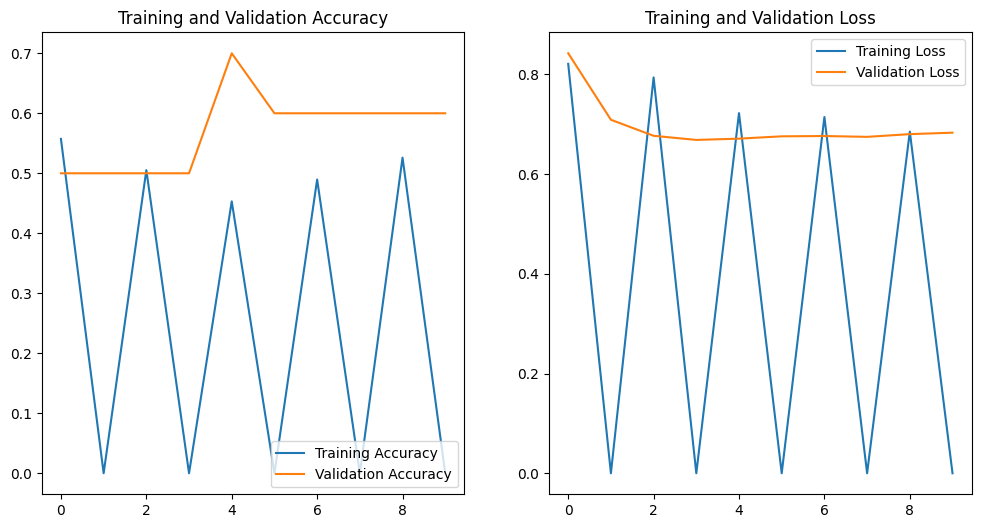

In [15]:
# Ajustar o epochs_range para corresponder ao tamanho de val_acc
epochs_range = range(len(val_acc))  # Isso ajustará o intervalo para 10 épocas

# Plotar os gráficos com base no número de épocas correto
plt.figure(figsize=(12, 6))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:len(val_acc)], label='Training Accuracy')  # Ajustar acc se também tiver 20 valores
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss[:len(val_acc)], label='Training Loss')  # Ajustar loss se também tiver 20 valores
plt.plot(epochs_range, val_loss[:len(val_acc)], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [16]:
# Fazendo previsões
# Aqui usaremos o test_generator para fazer previsões sobre o conjunto de teste
predictions = model.predict(test_generator)

# Convertendo previsões para classe
# Como estamos usando 'tanh', a saída é entre -1 e 1. Precisamos converter isso para 0 ou 1.
predicted_classes = np.where(predictions > 0, 1, 0)

# Imprimir as primeiras 10 previsões para ver o desempenho
print("Previsões para as primeiras 10 imagens de teste: ", predicted_classes[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Previsões para as primeiras 10 imagens de teste:  [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
